# Clustering
Consiste en agrupar un conjunto de objetos (no etiquetados) en subconjuntos de objetos llamados Clusters. Cada Cluster está formado por una colección de objetos que son similares (o se consideran similares) entre sí, pero que son distintos respecto a los objetos de otros Clusters.

Cluster: Conjunto de objetos que son similares entre sí.

Clustering: Tarea de dividir un conjunto de objetos en subconjuntos de objetos (Clusters) similares entre sí.

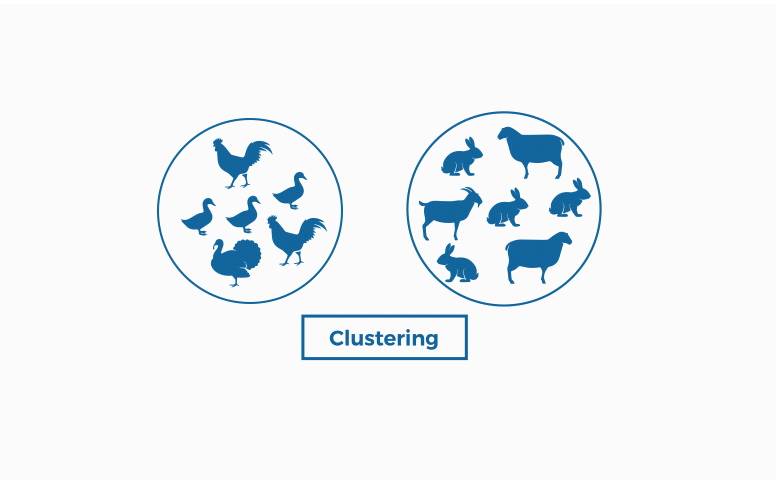

## Empresas
Se usa normalmente para compañias que necesitan encontran aspectos en comun entre sus clientes para encotrarles grupos o enfonques de productos, inclusive hasta servicio.
por lo tanto, si un porcentaje significativo de clientes tiene ciertos aspectos en comun (año, tipo de familia, gustos por productos o servicios especificos, colores, etc.) la compañía puede hacer la venta u ofrecimiento de cierto tipo de producto, servicio ,promocion, descuentos o campañas.

## Machine Learning
Clustering aquí se enmarca dentro del aprendizaje no supervisado, osea que para que esta técnica solo se dispone de un conjunto de datos entrada, sobre los que debemos obtener información sobre la estructura del dominio de salida, que es una información de la cual no se dispone.

## Vida Real
Cabe destacar que muchas empresas utilizan este tipo de algoritmo para el beneficio de sus clientes.
una de ellas es NETFLIX quien utiliza este para su sistema de recomendacion, se ha confirmado que la compañía usa por lo menos un estimado de 2000 agrupaciones que tienen un gusto similar de vistas, los clasifica por medio de comunidad.
por ejemplor, Agrupacion 290 is la que incluye personas que les gusta las series de "Lost","Black Mirror" y "Ground Hog Day".
la compañía usa estas agrupaciones para hace un conocimiento refinado de los gustos de vista de los clientes y por lo tan estos hacen mejores decisiones al crear una nueva serie original, podria considerarse un nicho de mercado.



## Funciones y Librerias
%matplotlib inline: Esto realiza la configuración necesaria detrás de escena para que IPython funcione correctamente de la mano con matplotlib

Pandas: Pandas es una librería de python destinada al análisis de datos, que proporciona unas estructuras de datos flexibles y que permiten trabajar con ellos de forma muy eficiente.

NumPy: NumPy es una extensión de Python, que le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices.

Matplotlib: Es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy.

sklearn.preprocessing.StandardScaler: La estandarización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático: podrían comportarse mal si las características individuales no se parecen más o menos a los datos estándar distribuidos normalmente (por ejemplo, gaussiano con media 0 y varianza unitaria).

sklearn.cluster.KMeans: El problema k-means se resuelve utilizando el algoritmo de Lloyd o Elkan.En la práctica, el algoritmo k-means es muy rápido (uno de los algoritmos de agrupación más rápidos disponibles), pero cae en mínimos locales. Por eso puede ser útil reiniciarlo varias veces.

itertools; cycle, islice: El módulo estandariza un conjunto básico de herramientas rápidas y eficientes en memoria que son útiles por sí mismas o en combinación. Juntos, forman un "álgebra iteradora" que hace posible construir herramientas especializadas de manera sucinta y eficiente en Python puro. cycle: Haga un iterador que devuelva elementos del iterable y guarde una copia de cada uno. Cuando se agota el iterable, devuelve elementos de la copia guardada islice: Haga un iterador que devuelva elementos seleccionados del iterable. Si el inicio no es cero, los elementos del iterable se omiten hasta que se alcanza el inicio. Posteriormente, los elementos se devuelven consecutivamente a menos que el paso se establezca por encima de uno, lo que da como resultado que se omitan los elementos. Si stop es None , la iteración continúa hasta que el iterador se agota, si es que lo hace; de lo contrario, se detiene en la posición especificada.

pandas.plotting parallel_coordinates : la cual servira para hacer una grafica paralela que nos permitira visualizar mejor los resultados.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans  
from itertools import cycle, islice 
from pandas.plotting import parallel_coordinates 

In [5]:
data = pd.read_csv('Datasets/Clustering/minute_weather.csv')

# Dataset de tiempo el cual hace una medicion cada minuto en San Diego desde el año 2011 al 2014 

In [7]:
#Tamaño del dataset
data.shape

(1035959, 13)

# Mostramos los primeros datos en la lista, el data set cu3nta con:
## rowId: 
            # Identificador unico para cada fila
## hpwren_timestamp: 
            # Tiempo en el que se tomo la medida que incluye su fecha, hora, minuto y segundo.
## air_pressure: 
            # Presion de aire medida en hectopascales que equivalen a 100 pascales
## air_temp: 
            # Medicion de la temperatura hecha en grados Fahrenheit
## avg_wind_direction: 
            # Medida particular en la que tomamos el norte como el grado 0 y las 
            # demas direcciones como diferentes grados ( este= 90, sur =180, oeste = 240)
## avg_wind_speed:
            # Medida de velocidad promedio del viento en metros por segundo
            # Esta es tomada con un estimado del todas la velocidades alcanzadas en el minuto
## ax_wind_direction:
            # Cambio maximo de la direccion del viento en el minuto en grados
## max_wind_speed:
            # Medida de la velocidad maxima en metros por segundo que alcanzo en el minuto
## min_wind_direction:
            # Cambio minimo en la direccion del viento en un minuto en grados
## min_wind_speed:
            # Velocidad minima que alcanzo el viento en metros por segundo
## rain_accumulation:
            # Cantidad de lluvia medida en ese tiempo en unidad de milimetros.
## rain_duration:
            # Duracion de la lluvia entre medicion y medicion en segundos
## relative_humidity:
            # Humedad relativa captada en porcentaje

In [8]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [9]:
#Aqui usaremos una data de muestra, ya que el data set contiene minutos entonces tendremos demasiada
#informacion para analizar por lo tanto solo tomaremos una parte para el analisis
#De manera que tomaremos solo cada 10 filas, asi no cargaremos tanto maquina y podremos hacer calculos mas facil.
sampled_df = data[(data['rowID'] % 10) == 0]

#el dataset de muestra es de un tamaño mas reducido que el original
sampled_df.shape

(103596, 13)

# Estadisticas generales
### describe()
se usa para ver algunos detalles estadísticos básicos como percentil, media, estándar, etc. de un marco de datos o una serie de valores numéricos.
Mientras que transpose invierte las filas y columnas de la descripcion para mas facil comprencion

In [10]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,103596.0,517975.000000,299057.335807,0.00,258987.50,517975.00,776962.5,1035950.00
air_pressure,103596.0,916.899190,3.103224,905.00,914.80,916.70,918.8,929.50
air_temp,103596.0,60.746446,12.018883,31.64,51.62,60.44,69.8,99.50
avg_wind_direction,103570.0,161.816153,95.822778,0.00,62.00,182.00,217.0,359.00
avg_wind_speed,103570.0,2.761964,2.022378,0.00,1.30,2.20,3.8,31.90
max_wind_direction,103570.0,162.616906,92.642151,0.00,68.00,187.00,223.0,359.00
max_wind_speed,103570.0,3.384269,2.367461,0.10,1.60,2.70,4.6,32.20
min_wind_direction,103570.0,166.889621,97.966455,0.00,75.00,180.00,212.0,359.00
min_wind_speed,103570.0,2.127273,1.724322,0.00,0.80,1.60,3.0,31.60
rain_accumulation,103595.0,0.000322,0.007762,0.00,0.00,0.00,0.0,1.17


In [11]:
#se borran las columnas nulas, debido a que en lugar de llenarlas
#(porque son datos numericos con no mucha varianza que valla a afectar realamente a los calculo)
#ademas se usara una muestra del dataset por lo que no son necesarios todos los datos.

In [12]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [13]:
rows_before - rows_after

27

In [14]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [15]:
#Vamos a escoger las columnas que usaremos vamos a remover las columnas de rain_duration
#y rain_duration ya que no nos interesan para el ejercicio
#Se podrian dejar en caso de querer evaluar algo respecto a ellas 
#Pero para efectos practicos de momento dolo nos quedaremos con 7 columnas de todas.
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity' ]

In [18]:
#Nuevo dataframe con las columnas deseadas
select_df = sampled_df[features]

In [19]:
#Impirmimos para comprobar cambios
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [20]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
50,912.1,63.68,102.0,1.2,119.0,1.5,51.4
...,...,...,...,...,...,...,...
1035910,920.1,68.54,234.0,0.3,296.0,0.5,24.1
1035920,920.1,69.08,112.0,0.1,202.0,0.2,37.6
1035930,920.1,69.98,255.0,0.9,282.0,1.2,42.5
1035940,920.1,70.52,197.0,1.1,211.0,1.4,47.4


In [21]:
#los modelos, clases y funciones de python utilizan  matrices para trabajar
#se estandarizan los valores del dataset como las diferentes columnas tienen diferentes escalas
#Entonces estadariza para que todo siga una misma norma
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48211741,  0.12401795, -0.18593511, ...,  0.04730627,
        -0.6691938 , -0.4045476 ],
       [-1.51434234,  0.21387884, -0.64511713, ..., -0.43843462,
        -0.37351757,  0.35390325],
       [-1.51434234,  0.15397158, -0.73904073, ..., -0.64352522,
        -0.41575703,  0.33858101],
       ...,
       [ 1.03142756,  0.76802096,  0.97245591, ...,  1.28864411,
        -0.92263056, -0.25132521],
       [ 1.03142756,  0.8129514 ,  0.36717051, ...,  0.52225292,
        -0.83815164, -0.06362778],
       [ 1.06365249,  0.67816008, -1.16691489, ..., -1.03211794,
        -0.96487003,  0.08959462]])

# Comenzamos a usar k-means para hacer el clustering
Cuando creamos los cluster lo que hacemos es agrupar datos parecidos entre si por lo tanto 
asi como minimizamos datos escogiendo multiplos divisibles entre 10 reducimos con lo que tenenemos que trabajar, lo que diferencia esto es que se toman los datos que teniamos y agrupandolos.
No se estan elminando datos como la primera vez, Si no que se estan compactando.

In [24]:
#Creamos 12 clusters en este caso por la cantidad de datos
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("modelo\n", model)

modelo
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [39]:
#La media de los clusters 
centers = model.cluster_centers_
centers

array([[ 1.09874915, -0.33962134, -1.1332269 ,  1.97053268, -1.03563855,
         2.06312502, -1.13670306],
       [-0.83145231, -0.527737  ,  0.21863205, -0.60250603,  0.37652027,
        -0.60294519,  0.98018396],
       [-0.161023  ,  0.61821565,  0.40728018,  0.62552974,  0.52279759,
         0.56930046, -0.18177975],
       [ 0.12843058, -0.76813718, -1.22717656, -0.5481489 , -1.0743044 ,
        -0.56183307,  0.7934548 ],
       [-0.75471397, -1.19677429,  0.38894462,  0.6284823 ,  0.50647418,
         0.61659586,  1.36590409],
       [ 0.25297337,  0.31215669,  1.88304402, -0.6510073 , -1.53329939,
        -0.57097297, -0.2778761 ],
       [ 0.02988985,  0.7327001 ,  0.22693961, -0.65421495,  0.41923859,
        -0.66737732, -0.59871243],
       [-0.18180882,  0.92834561, -1.29437163, -0.5645089 , -1.14932098,
        -0.58005731, -0.67047423],
       [ 0.16549213,  0.7532384 ,  1.42965422, -0.66841815,  1.70245917,
        -0.62662563, -0.74449199],
       [-1.16018502, -0.6919

# Plots
Funciones que nos ayudaran a graficar la primera sera hecha a partir de las medias del los clusters


In [26]:
#Aqui estamos creando una tabla de predicciones que enumerara nuestros clusters para ver cuales de ellos 
#cuantan conlas caracteristicas que buscamos
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [27]:
#Con esta funcion estableceremos algunos colores que nos ayuden para ver mejor las graficas
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [37]:
#Unimos las predicciones de los clusters junto con sus nombres y y sus medias y mostramos como quedaria con los que vamos a trabajar
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,1.098749,-0.339621,-1.133227,1.970533,-1.035639,2.063125,-1.136703,0
1,-0.831452,-0.527737,0.218632,-0.602506,0.376520,-0.602945,0.980184,1
2,-0.161023,0.618216,0.407280,0.625530,0.522798,0.569300,-0.181780,2
3,0.128431,-0.768137,-1.227177,-0.548149,-1.074304,-0.561833,0.793455,3
4,-0.754714,-1.196774,0.388945,0.628482,0.506474,0.616596,1.365904,4
5,0.252973,0.312157,1.883044,-0.651007,-1.533299,-0.570973,-0.277876,5
6,0.029890,0.732700,0.226940,-0.654215,0.419239,-0.667377,-0.598712,6
7,-0.181809,0.928346,-1.294372,-0.564509,-1.149321,-0.580057,-0.670474,7
8,0.165492,0.753238,1.429654,-0.668418,1.702459,-0.626626,-0.744492,8
9,-1.160185,-0.691912,0.473267,2.030971,0.565911,2.006918,0.737180,9


# Preguntas 
### Como se comportaria el climar cuando su humedad relativa fuera menor a -0.5?

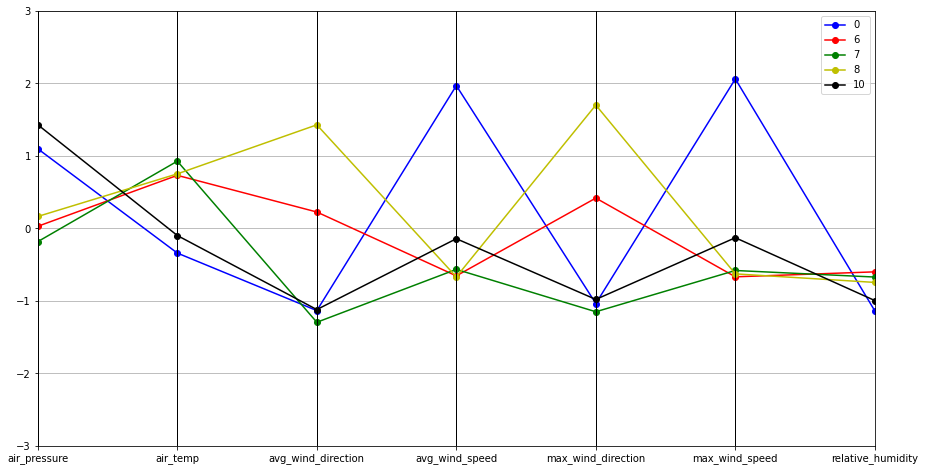

In [32]:
#como se comportaria el clima cuando su humedad relativa fuera menor a -0.5
parallel_plot(P[P['relative_humidity'] < -0.5])

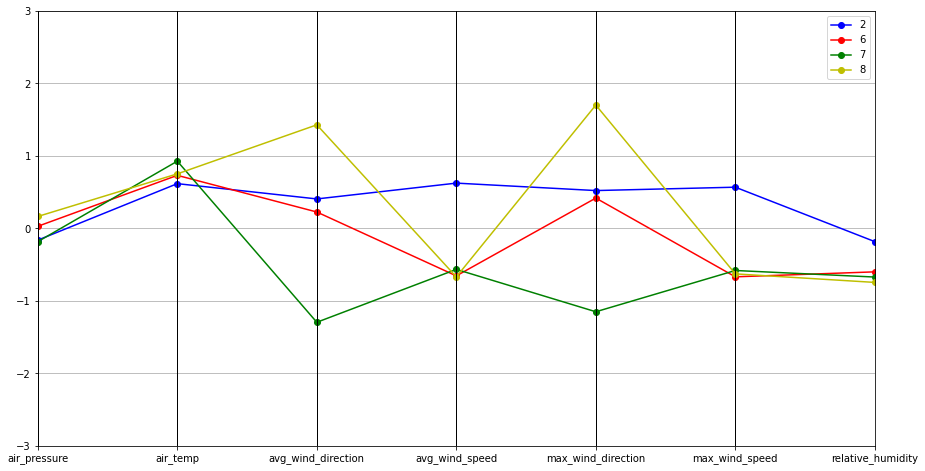

In [33]:
#Ahora probamos con la temperatura del aire y los que cumplen con este parametro de ser mayor de 0.5
parallel_plot(P[P['air_temp'] > 0.5])

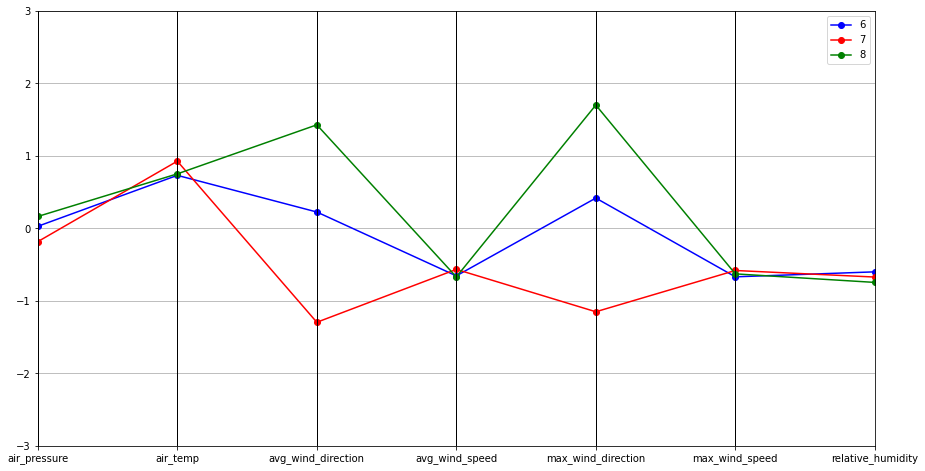

In [34]:
#Ahora haremos una consulta a partir de dos variables anteriores
parallel_plot(P[(P['relative_humidity'] < -0.5) & (P['air_temp'] > 0.5)])